<a href="https://colab.research.google.com/github/Asadullah-Dogar/police-fatalities/blob/main/police-fatalities/Fatal_Force.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

## Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [ ]:
df_pct_poverty.shape

(29329, 3)

In [ ]:
df_pct_completed_hs.shape

(29329, 3)

In [ ]:
df_share_race_city.shape

(29268, 7)

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [ ]:
df_hh_income.isna().sum()

,0
Geographic Area,0
City,0
Median Income,51


In [ ]:
df_hh_income = df_hh_income.dropna(subset=['Median Income'])

In [ ]:
df_hh_income.duplicated().sum()

0

In [ ]:
df_pct_poverty.isna().sum()


,0
Geographic Area,0
City,0
poverty_rate,0


In [ ]:
df_pct_poverty.duplicated().sum()

0

In [ ]:
df_pct_completed_hs.isna().sum()

,0
Geographic Area,0
City,0
percent_completed_hs,0


In [ ]:
df_pct_completed_hs.duplicated().sum()

0

In [ ]:
df_share_race_city.isna().sum()

,0
Geographic area,0
City,0
share_white,0
share_black,0
share_native_american,0
share_asian,0
share_hispanic,0


In [ ]:
df_share_race_city.duplicated().sum()

0

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

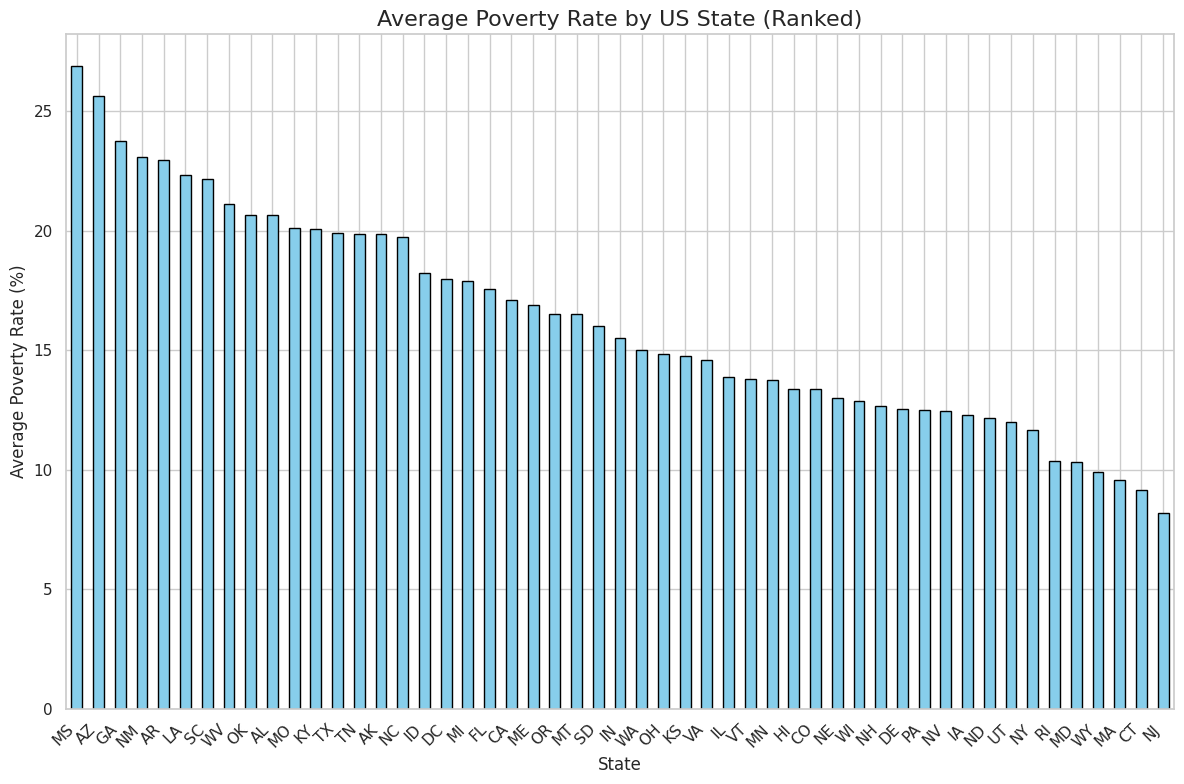

State with highest poverty rate: MS (26.88%)
State with lowest poverty rate: NJ (8.19%)


In [ ]:
# Convert poverty_rate to numeric, handling errors due to possible non-numeric entries
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')

# Calculate the average poverty rate by state
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
state_poverty.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Average Poverty Rate by US State (Ranked)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Poverty Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Identify the states with the highest and lowest poverty rates
highest_poverty_state = state_poverty.idxmax()
lowest_poverty_state = state_poverty.idxmin()
highest_poverty_rate = state_poverty.max()
lowest_poverty_rate = state_poverty.min()

print(f"State with highest poverty rate: {highest_poverty_state} ({highest_poverty_rate:.2f}%)")
print(f"State with lowest poverty rate: {lowest_poverty_state} ({lowest_poverty_rate:.2f}%)")


# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

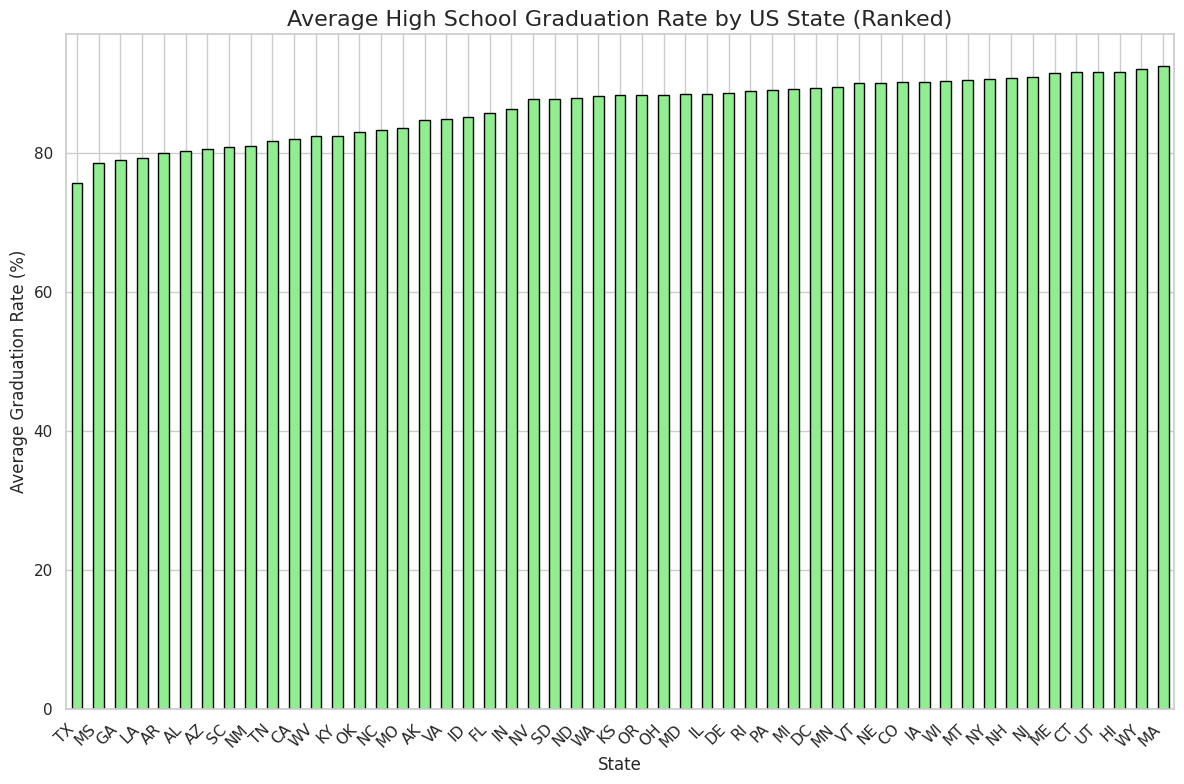

('MA', 92.40408163265306, 'TX', 75.69)

In [ ]:
# Convert percent_completed_hs to numeric, handling errors due to possible non-numeric entries
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

# Calculate the average high school graduation rate by state
state_hs_graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().sort_values()

# Plot the bar chart
plt.figure(figsize=(12, 8))
state_hs_graduation.plot(kind='bar', color='lightgreen', edgecolor='black')

# Add labels and title
plt.title('Average High School Graduation Rate by US State (Ranked)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Graduation Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Identify the states with the highest and lowest graduation rates
highest_grad_state = state_hs_graduation.idxmax()
lowest_grad_state = state_hs_graduation.idxmin()
highest_grad_rate = state_hs_graduation.max()
lowest_grad_rate = state_hs_graduation.min()

highest_grad_state, highest_grad_rate, lowest_grad_state, lowest_grad_rate


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

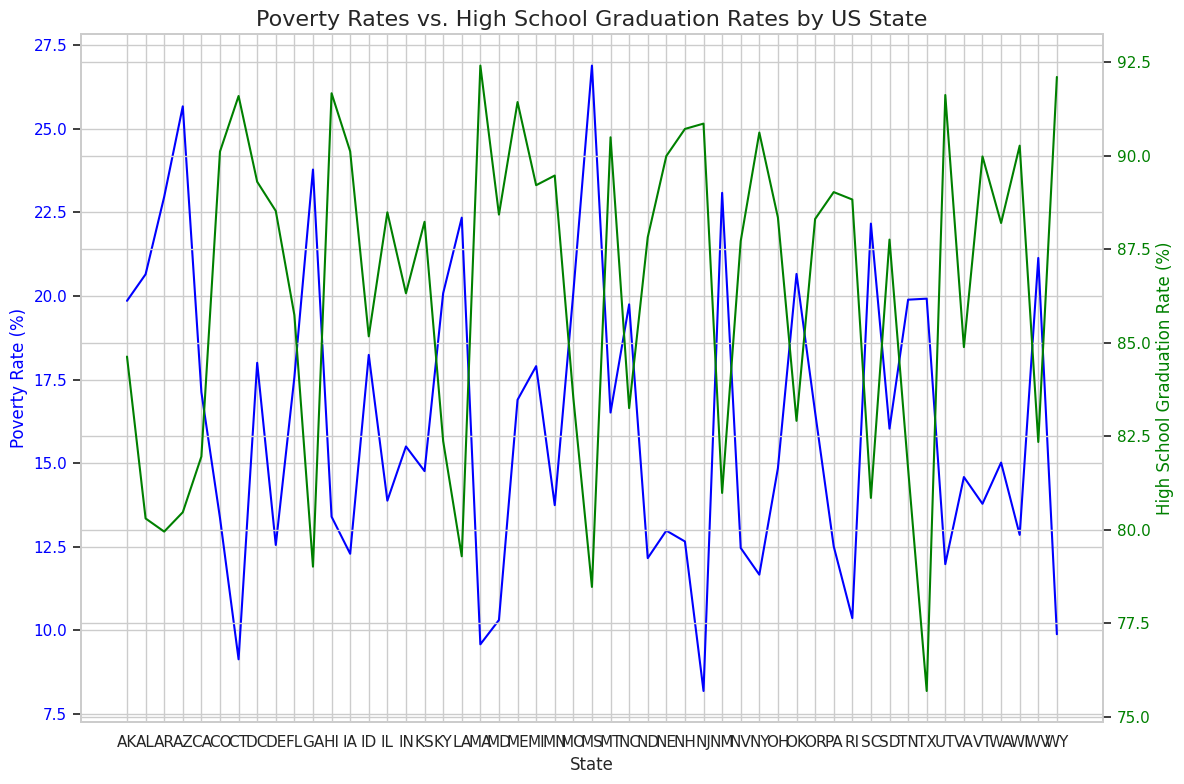

In [ ]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

# Compute average poverty rate and graduation rate by state
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()
state_hs_graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()

# Combine the two metrics into a single DataFrame
state_metrics = pd.DataFrame({
    'Poverty Rate (%)': state_poverty,
    'High School Graduation Rate (%)': state_hs_graduation
}).dropna()

# Plot the dual-axis line chart
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot poverty rates on the first y-axis
ax1.plot(state_metrics.index, state_metrics['Poverty Rate (%)'], color='blue', label='Poverty Rate (%)')
ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Poverty Rate (%)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Plot graduation rates on the second y-axis
ax2 = ax1.twinx()
ax2.plot(state_metrics.index, state_metrics['High School Graduation Rate (%)'], color='green', label='High School Graduation Rate (%)')
ax2.set_ylabel('High School Graduation Rate (%)', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and format x-axis
plt.title('Poverty Rates vs. High School Graduation Rates by US State', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Show the plot
fig.tight_layout()
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

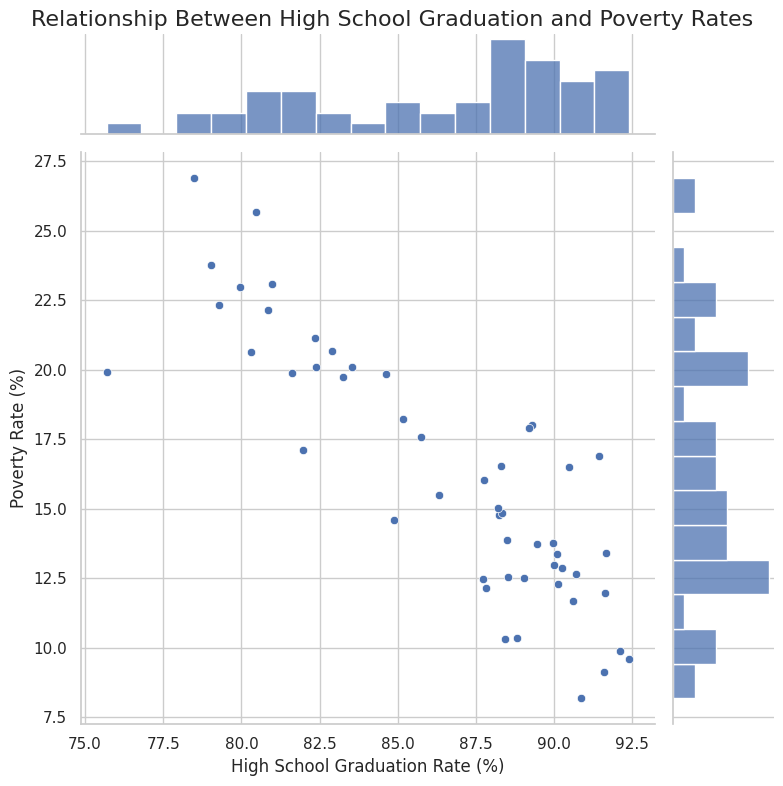

In [ ]:
# Ensure poverty rates and graduation rates are numeric
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

# Compute average poverty rate and graduation rate by state
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()
state_hs_graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()

# Combine the two metrics into a single DataFrame
state_metrics = pd.DataFrame({
    'Poverty Rate (%)': state_poverty,
    'High School Graduation Rate (%)': state_hs_graduation
}).dropna()

# Create the jointplot
sns.set(style="whitegrid")
joint_plot = sns.jointplot(
    data=state_metrics,
    x="High School Graduation Rate (%)",
    y="Poverty Rate (%)",
    kind="scatter",  # You can change to "kde" for Kernel Density Estimate
    height=8,
    marginal_kws={"bins": 15, "fill": True}  # Histogram bins for the margins
)

# Add a title
joint_plot.fig.suptitle("Relationship Between High School Graduation and Poverty Rates", fontsize=16)
joint_plot.fig.tight_layout()
joint_plot.fig.subplots_adjust(top=0.95)

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

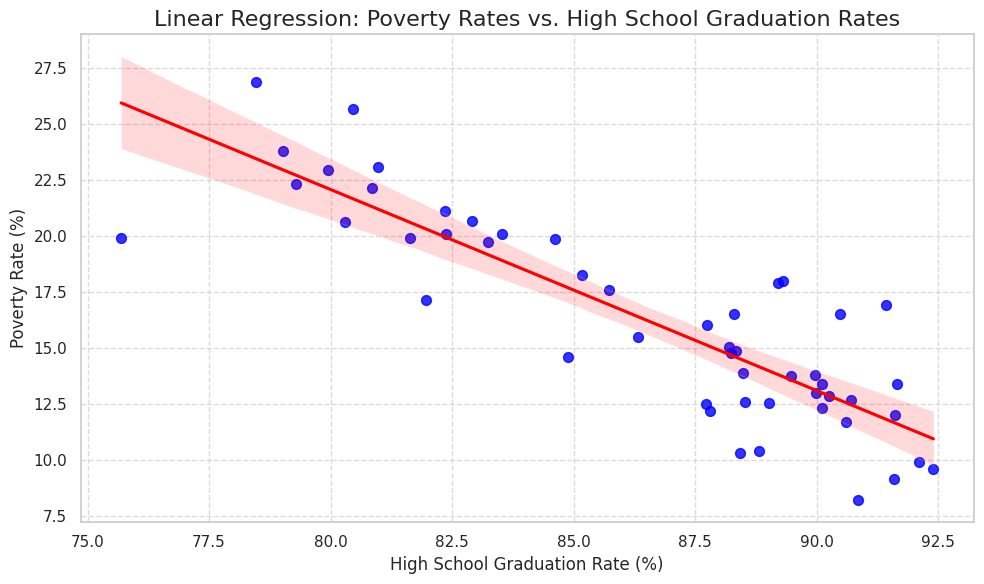

In [ ]:
# Ensure poverty rates and graduation rates are numeric
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

# Compute average poverty rate and graduation rate by state
state_poverty = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean()
state_hs_graduation = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean()

# Combine the two metrics into a single DataFrame
state_metrics = pd.DataFrame({
    'Poverty Rate (%)': state_poverty,
    'High School Graduation Rate (%)': state_hs_graduation
}).dropna()

# Create the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=state_metrics,
    x="High School Graduation Rate (%)",
    y="Poverty Rate (%)",
    scatter_kws={"color": "blue", "s": 50},  # Customize scatter points
    line_kws={"color": "red"},               # Customize regression line
)

# Add labels and title
plt.title("Linear Regression: Poverty Rates vs. High School Graduation Rates", fontsize=16)
plt.xlabel("High School Graduation Rate (%)", fontsize=12)
plt.ylabel("Poverty Rate (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

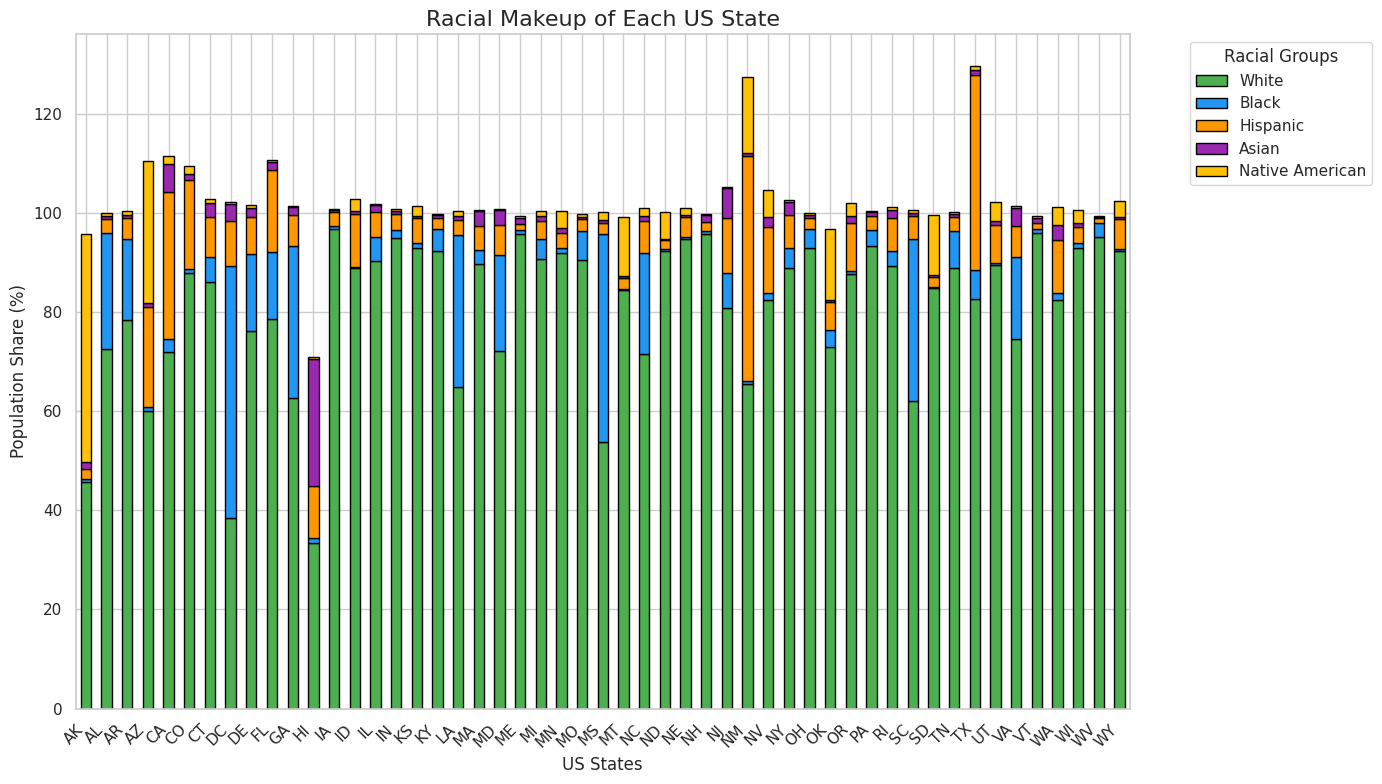

In [ ]:
# Convert race columns to numeric
race_columns = ['share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american']
for col in race_columns:
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors='coerce')

# Aggregate the racial makeup by state
state_race_share = df_share_race_city.groupby('Geographic area')[race_columns].mean()

# Plot the stacked bar chart
state_race_share.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=['#4CAF50', '#2196F3', '#FF9800', '#9C27B0', '#FFC107'],
    edgecolor='black'
)

# Add labels, title, and legend
plt.title('Racial Makeup of Each US State', fontsize=16)
plt.xlabel('US States', fontsize=12)
plt.ylabel('Population Share (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(['White', 'Black', 'Hispanic', 'Asian', 'Native American'], loc='upper left', bbox_to_anchor=(1.05, 1), title="Racial Groups")
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

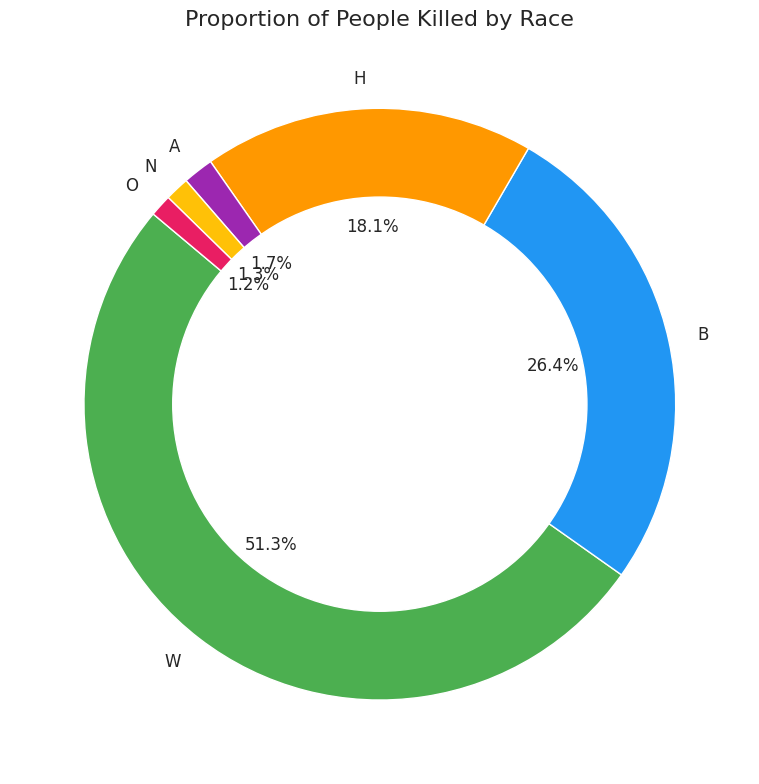

In [ ]:
# Count the number of people killed by each race
race_counts = df_fatalities['race'].value_counts()

# Plot the donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    race_counts,
    labels=race_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#4CAF50', '#2196F3', '#FF9800', '#9C27B0', '#FFC107', '#E91E63'],
    textprops={'fontsize': 12}
)

# Add a white circle in the center to create the "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add a title
plt.title('Proportion of People Killed by Race', fontsize=16)

# Display the chart
plt.tight_layout()
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

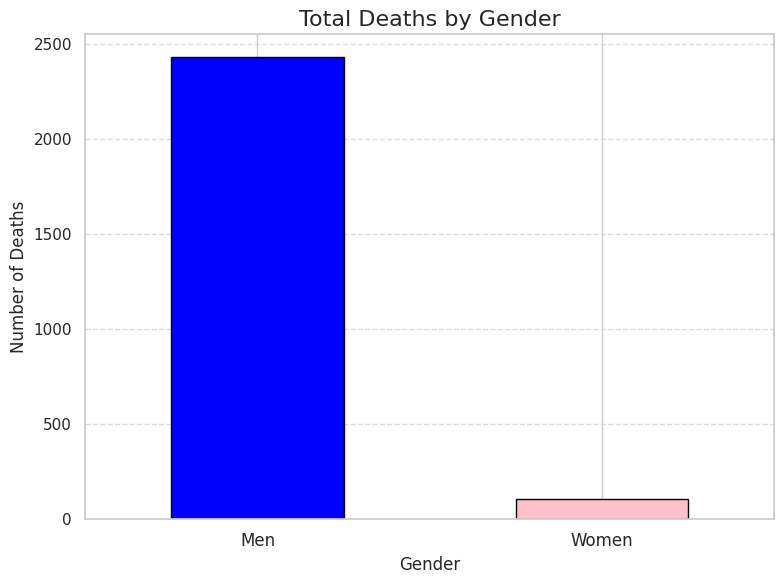

In [ ]:

# Count the number of deaths by gender
gender_counts = df_fatalities['gender'].value_counts()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'], edgecolor='black', ax=ax)

# Customize the chart
ax.set_title('Total Deaths by Gender', fontsize=16)
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Number of Deaths', fontsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Men', 'Women'], rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.tight_layout()
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

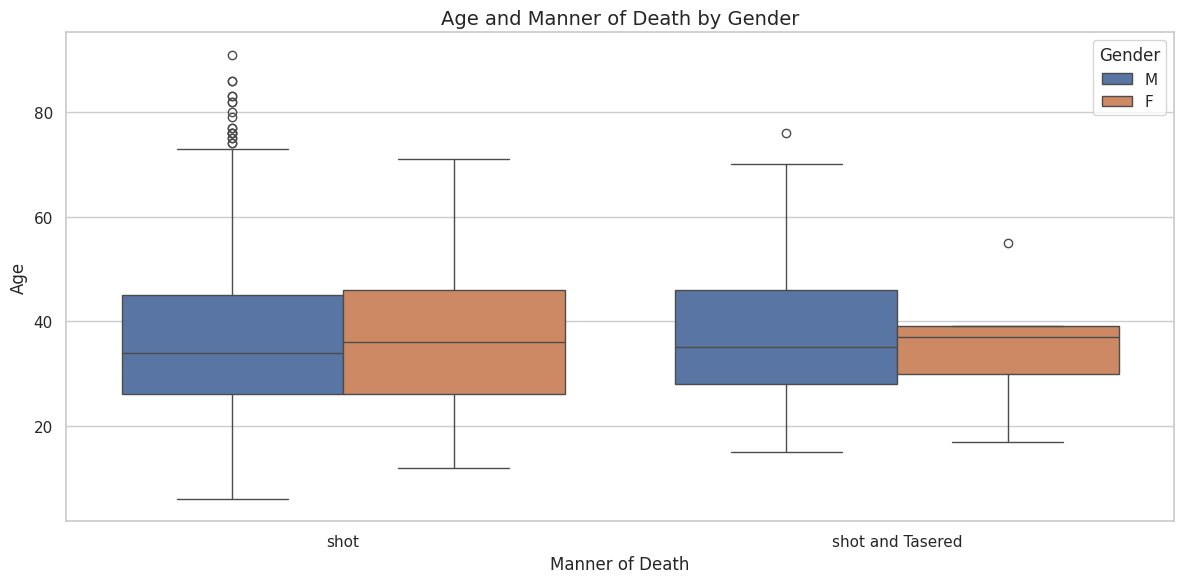

In [ ]:
filtered_data = df_fatalities[["age", "manner_of_death", "gender"]].dropna()

# Convert 'age' to numeric, handling any invalid entries
filtered_data["age"] = pd.to_numeric(filtered_data["age"], errors='coerce')
filtered_data = filtered_data.dropna()  # Drop rows with non-numeric age

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x="manner_of_death", y="age", hue="gender")
plt.title("Age and Manner of Death by Gender", fontsize=14)
plt.xlabel("Manner of Death", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

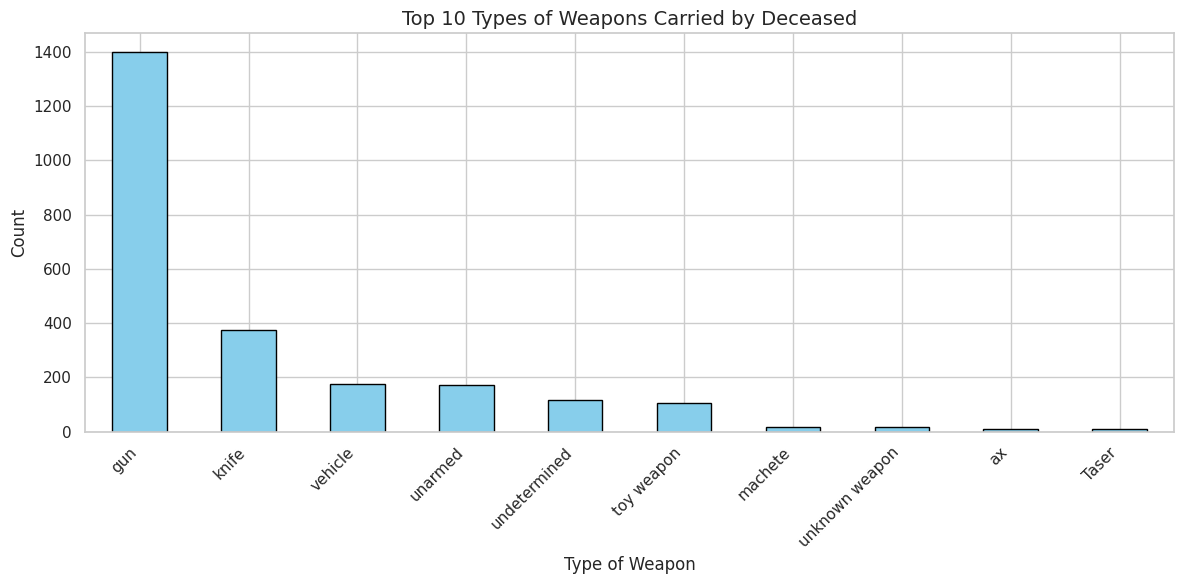

In [ ]:
# Analyze the "armed" column in the dataset
armed_data = df_fatalities["armed"].value_counts(normalize=False)
armed_percentage = df_fatalities["armed"].value_counts(normalize=True) * 100

# Separate armed vs. unarmed
armed_vs_unarmed = {
    "Armed": df_fatalities[df_fatalities["armed"].str.lower() != "unarmed"].shape[0],
    "Unarmed": df_fatalities[df_fatalities["armed"].str.lower() == "unarmed"].shape[0],
}

# Plotting the kind of weapons carried
plt.figure(figsize=(12, 6))
armed_data.sort_values(ascending=False).head(10).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Types of Weapons Carried by Deceased", fontsize=14)
plt.xlabel("Type of Weapon", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

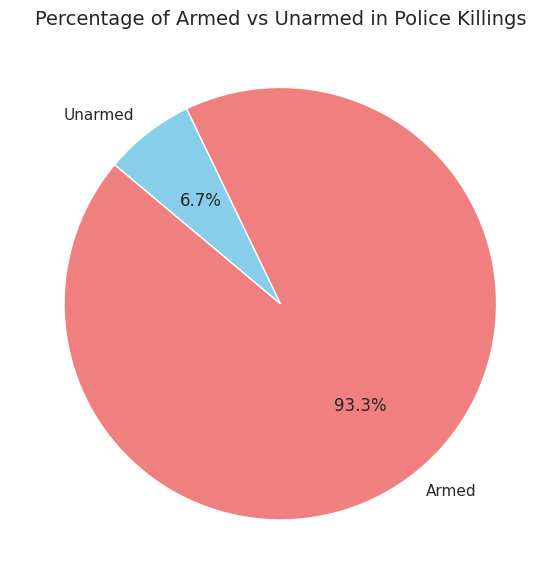

({'Armed': 2364, 'Unarmed': 171},
 armed
 gun              55.34
 knife            14.77
 vehicle           7.01
 unarmed           6.77
 undetermined      4.63
 toy weapon        4.12
 machete           0.71
 unknown weapon    0.71
 ax                0.36
 Taser             0.36
 Name: proportion, dtype: float64)

In [ ]:
# Plotting armed vs. unarmed
plt.figure(figsize=(6, 6))
plt.pie(
    armed_vs_unarmed.values(),
    labels=armed_vs_unarmed.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=["lightcoral", "skyblue"],
)
plt.title("Percentage of Armed vs Unarmed in Police Killings", fontsize=14)
plt.tight_layout()
plt.show()

armed_vs_unarmed, armed_percentage.head(10)

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
# Calculate the percentage of people killed who were under 25 years old
total_deaths = df_fatalities.shape[0]
under_25 = df_fatalities[df_fatalities["age"] < 25].shape[0]
under_25_percentage = (under_25 / total_deaths) * 100

under_25, total_deaths, under_25_percentage

(450, 2535, 17.75147928994083)

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

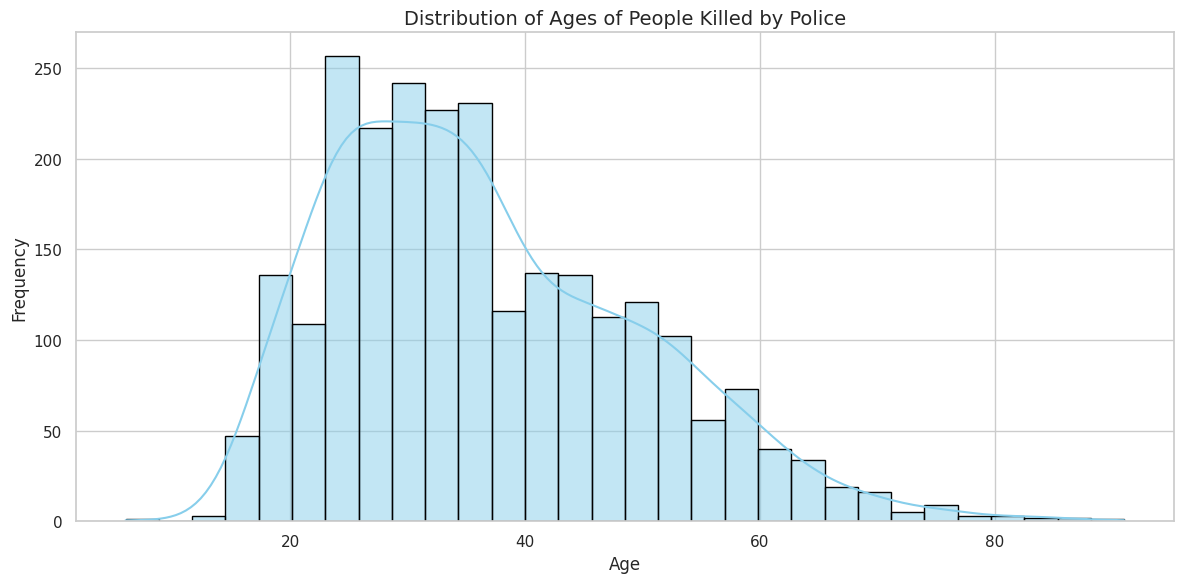

In [ ]:

# Filter the data to include valid ages
age_data = df_fatalities["age"].dropna()  # Remove missing values
age_data = pd.to_numeric(age_data, errors='coerce').dropna()  # Ensure ages are numeric

# Plot the histogram and KDE
plt.figure(figsize=(12, 6))
sns.histplot(age_data, kde=True, bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of Ages of People Killed by Police", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()


Create a seperate KDE plot for each race. Is there a difference between the distributions?

# Race of People Killed

Create a chart that shows the total number of people killed by race.

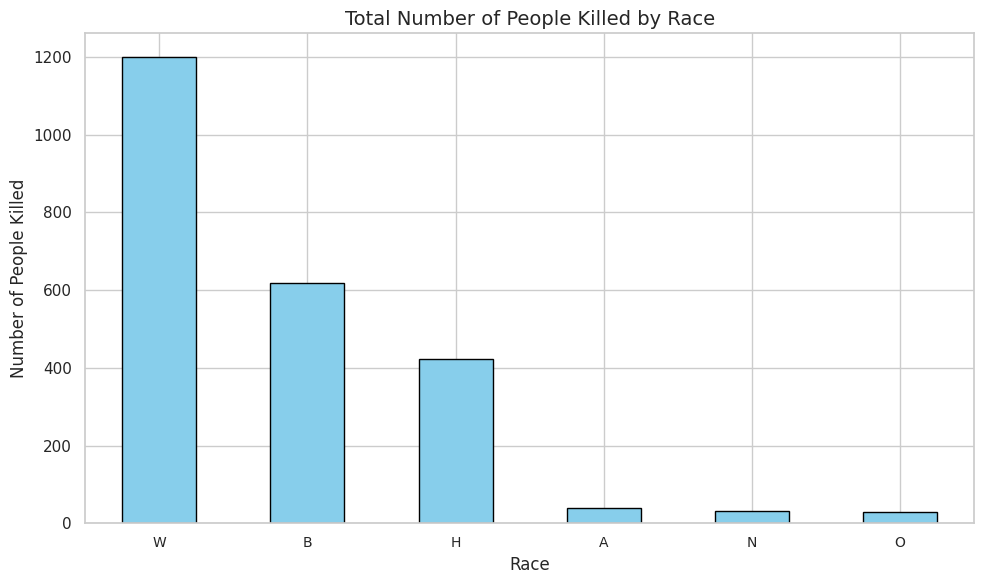

In [ ]:
race_data = df_fatalities["race"].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
race_data.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Number of People Killed by Race", fontsize=14)
plt.xlabel("Race", fontsize=12)
plt.ylabel("Number of People Killed", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
# Calculate the percentage of people killed by police with a diagnosed mental illness
total_deaths = df_fatalities.shape[0]
mental_illness_cases = df_fatalities[df_fatalities["signs_of_mental_illness"] == True].shape[0]
mental_illness_percentage = (mental_illness_cases / total_deaths) * 100

mental_illness_cases, total_deaths, mental_illness_percentage

(633, 2535, 24.970414201183434)

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

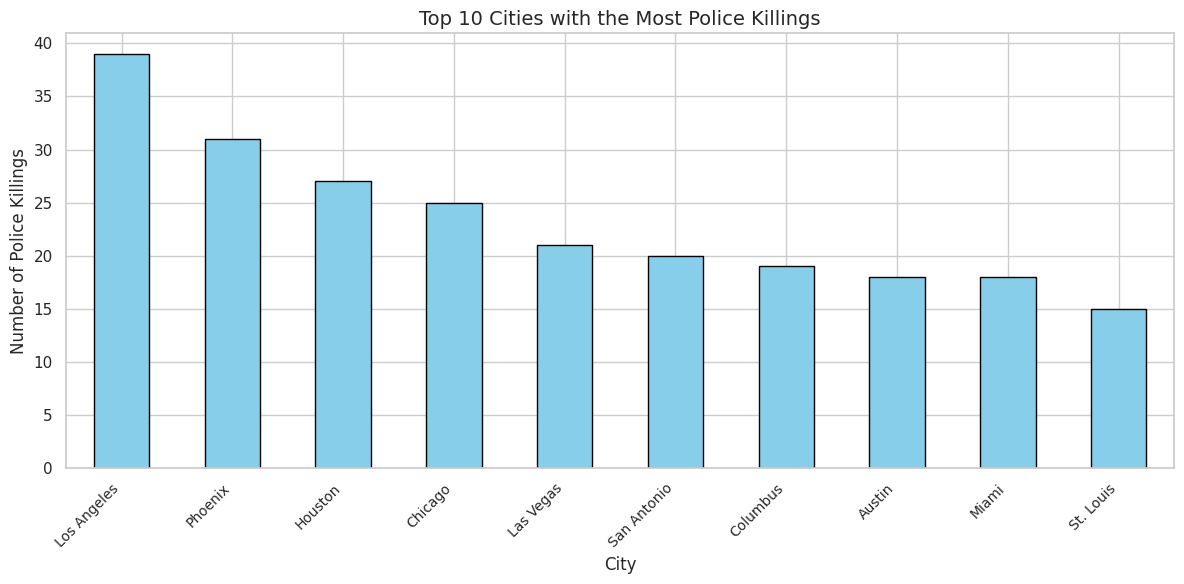

In [ ]:
# Count the number of police killings by city
city_killings = df_fatalities["city"].value_counts().head(10)

# Create a bar chart for the top 10 cities
plt.figure(figsize=(12, 6))
city_killings.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Cities with the Most Police Killings", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Police Killings", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville city,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville city,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [ ]:
top_cities_police_killings = df_fatalities["city"].value_counts().head(10).index
top_cities_police_killings = top_cities_police_killings.str.title()  # Ensure consistency

# Convert city names to title case for consistency in df_share_race_city
df_share_race_city['City'] = df_share_race_city['City'].str.title()

# Step 2: Map the racial share data columns to understandable names
column_mapping = {
    'share_white': 'share_white',
    'share_black': 'share_black',
    'share_native_american': 'share_native_american',
    'share_asian': 'share_asian',
    'share_hispanic': 'share_hispanic',
}
df_share_race_city_mapped = df_share_race_city.rename(columns=column_mapping)

# Step 3: Filter the racial share data for these top 10 cities
top_city_race_share = df_share_race_city_mapped[df_share_race_city_mapped["City"].isin(top_cities_police_killings)]

# Step 4: Group and sum racial shares by city to get population shares
city_population = top_city_race_share.groupby("City")[['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']].sum()

# Step 5: Extract the deaths data for these top 10 cities
top_city_deaths = race_city_deaths.loc[top_cities_police_killings]

# Step 6: Calculate the death rate per racial group
race_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']  # Use actual column names



# Output the result
death_rate_by_race_df = pd.DataFrame(death_rate_by_race)
print(death_rate_by_race_df)

Empty DataFrame
Columns: []
Index: []


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [ ]:
# Preparing the data (assuming `df_fatalities` has a column "State" with abbreviations)
df_fatalities_by_state = df_fatalities.groupby("state").size().reset_index(name="fatalities")

# Creating a choropleth map using Plotly
fig = px.choropleth(
    df_fatalities_by_state,
    locations="state",
    locationmode="USA-states",
    color="fatalities",
    color_continuous_scale="Reds",
    scope="usa",
    title="Police Killings by U.S. State",
    labels={"Fatalities": "Number of Fatalities"},
)

# Display the map
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

<ipython-input-123-c161f503b7fc>:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



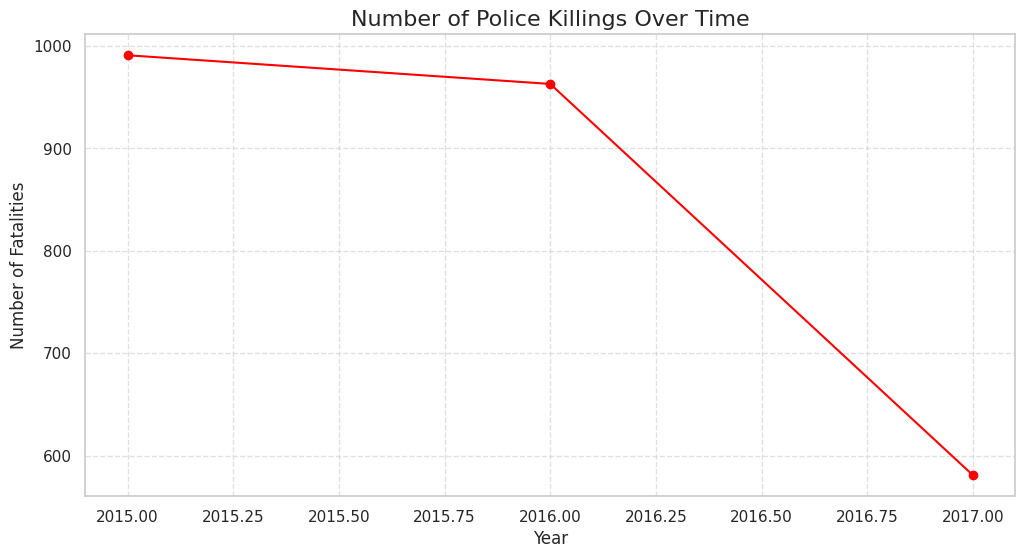

In [ ]:
df_fatalities.head()

# Assuming the dataset has a 'Date' column (adjust if necessary)
# Converting the 'Date' column to datetime format
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], errors='coerce')

# Extracting year and aggregating the number of fatalities by year
df_fatalities_by_year = df_fatalities.groupby(df_fatalities['date'].dt.year).size().reset_index(name="fatalities")
df_fatalities_by_year = df_fatalities_by_year.rename(columns={"date": "Year"})

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_fatalities_by_year['Year'], df_fatalities_by_year['fatalities'], marker='o', color='red', linestyle='-')
plt.title("Number of Police Killings Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Fatalities", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
df_fatalities.head()


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
